<a href="https://colab.research.google.com/github/Tanuj52/IIIT-Hyderabad-AI-ML-/blob/main/Module%2005/AIML_III_Module_5_Lab_2_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
#Regression Lab 2: Loss Functions


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


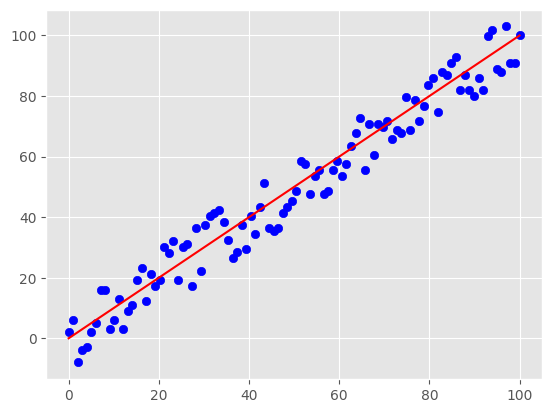

In [21]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [22]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [23]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

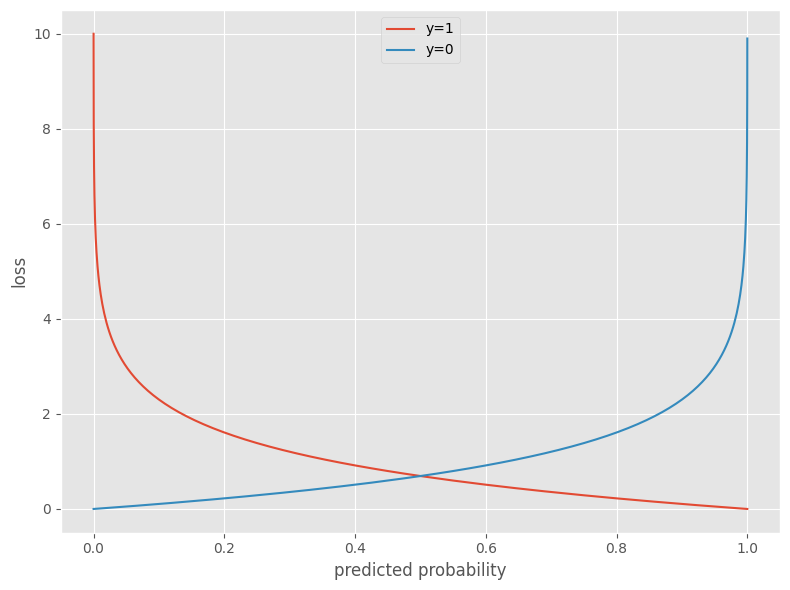

In [24]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

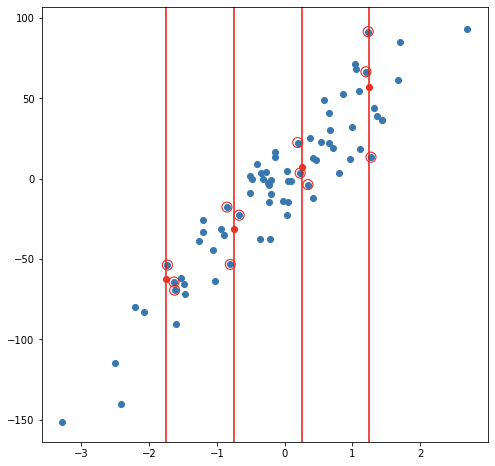

In [25]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [26]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [27]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [19]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [29]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

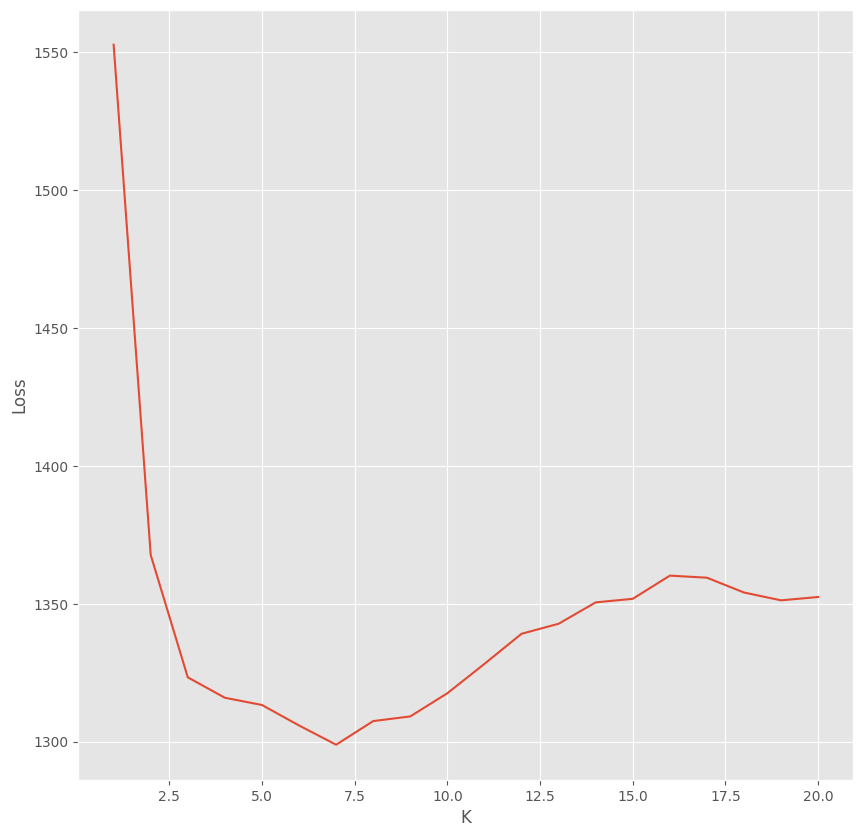

Minimum error 1298.9112636160419 is at k = 6


In [30]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.
4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

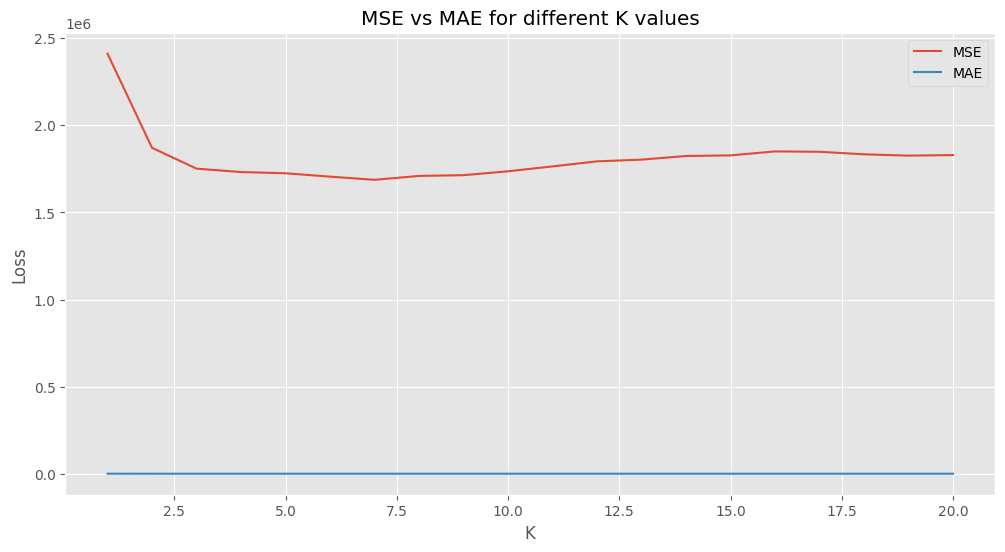

Minimum MSE: 1687170.4707486227 at k = 7
Minimum MAE: 922.6127160734237 at k = 7


In [31]:
# Exercise 1:Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
from sklearn.metrics import mean_squared_error, mean_absolute_error

def knn_regression_with_loss(k, x_train, y_train, x_test, y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    return mse, mae

mse_values = []
mae_values = []

for k in range(1, 21):
    mse, mae = knn_regression_with_loss(k, x_train, y_train, x_test, y_test)
    mse_values.append(mse)
    mae_values.append(mae)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), mse_values, label='MSE')
plt.plot(range(1, 21), mae_values, label='MAE')
plt.xlabel('K')
plt.ylabel('Loss')
plt.legend()
plt.title('MSE vs MAE for different K values')
plt.show()

print(f"Minimum MSE: {min(mse_values)} at k = {mse_values.index(min(mse_values)) + 1}")
print(f"Minimum MAE: {min(mae_values)} at k = {mae_values.index(min(mae_values)) + 1}")



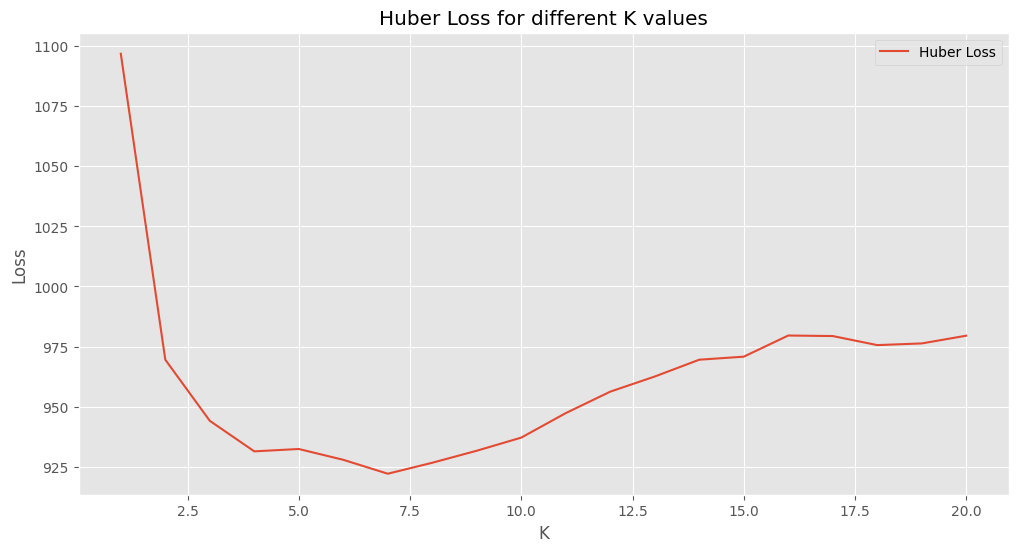

Minimum Huber Loss: 922.1127160734237 at k = 7


In [32]:
#Excercise 2:Explore other loss functions and try to understand when and why they are used.
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = np.square(error) / 2
    linear_loss = delta * (np.abs(error) - delta / 2)
    return np.where(is_small_error, squared_loss, linear_loss).mean()

huber_values = []

for k in range(1, 21):
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    huber = huber_loss(y_test, pred)
    huber_values.append(huber)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), huber_values, label='Huber Loss')
plt.xlabel('K')
plt.ylabel('Loss')
plt.legend()
plt.title('Huber Loss for different K values')
plt.show()

print(f"Minimum Huber Loss: {min(huber_values)} at k = {huber_values.index(min(huber_values)) + 1}")

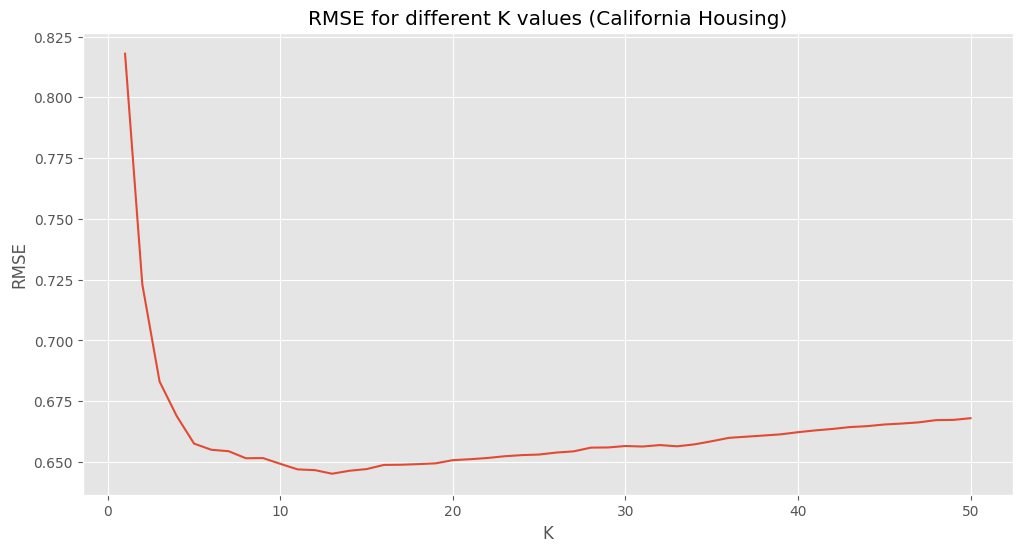

Best K value: 13 with RMSE: 0.6452046222487675
RMSE when K=1: 0.8179316411046703
RMSE when K=size of training set (16512): 1.1448563543099792


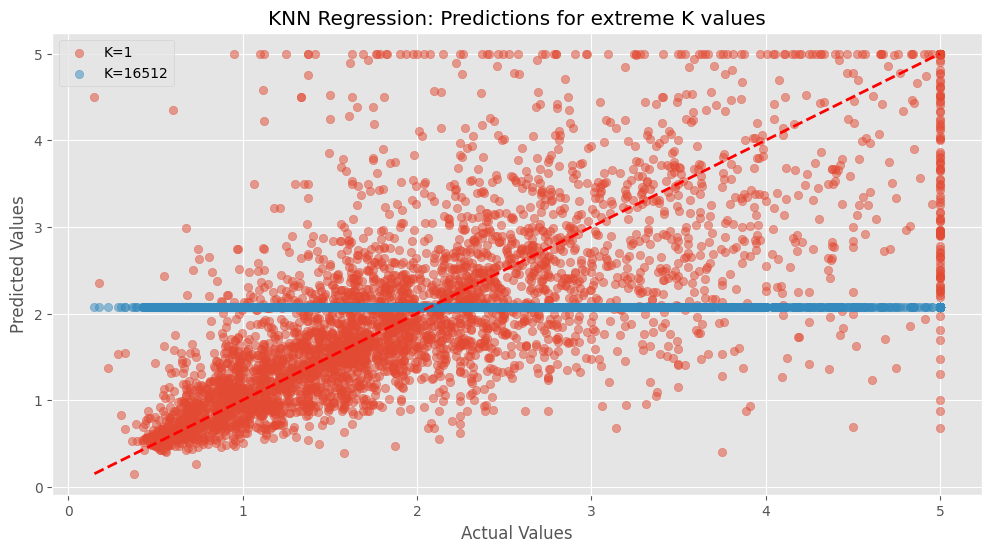

In [17]:
#Excercise 3:Try out KNN-regression on other datasets see which values of K give the best results.
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rmse_values = []

for k in range(1, 51):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    rmse_values.append(rmse)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), rmse_values)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE for different K values (California Housing)')
plt.show()

best_k = rmse_values.index(min(rmse_values)) + 1
print(f"Best K value: {best_k} with RMSE: {min(rmse_values)}")
# K = 1
model_k1 = neighbors.KNeighborsRegressor(n_neighbors=1)
model_k1.fit(X_train_scaled, y_train)
pred_k1 = model_k1.predict(X_test_scaled)
rmse_k1 = np.sqrt(mean_squared_error(y_test, pred_k1))

# K = size of training set
k_max = len(X_train)
model_kmax = neighbors.KNeighborsRegressor(n_neighbors=k_max)
model_kmax.fit(X_train_scaled, y_train)
pred_kmax = model_kmax.predict(X_test_scaled)
rmse_kmax = np.sqrt(mean_squared_error(y_test, pred_kmax))

print(f"RMSE when K=1: {rmse_k1}")
print(f"RMSE when K=size of training set ({k_max}): {rmse_kmax}")

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, pred_k1, label='K=1', alpha=0.5)
plt.scatter(y_test, pred_kmax, label=f'K={k_max}', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('KNN Regression: Predictions for extreme K values')
plt.show()

RMSE when K=1: 0.8179316411046703
RMSE when K=size of training set (16512): 1.1448563543099792


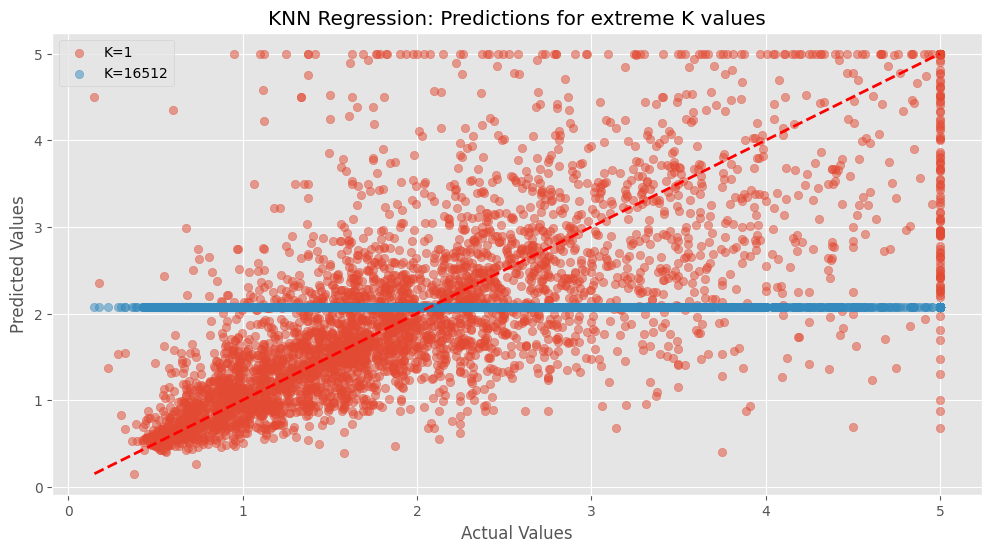

In [18]:
#Excercise 4:Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.
# K = 1
model_k1 = neighbors.KNeighborsRegressor(n_neighbors=1)
model_k1.fit(X_train_scaled, y_train)
pred_k1 = model_k1.predict(X_test_scaled)
rmse_k1 = np.sqrt(mean_squared_error(y_test, pred_k1))

# K = size of training set
k_max = len(X_train)
model_kmax = neighbors.KNeighborsRegressor(n_neighbors=k_max)
model_kmax.fit(X_train_scaled, y_train)
pred_kmax = model_kmax.predict(X_test_scaled)
rmse_kmax = np.sqrt(mean_squared_error(y_test, pred_kmax))

print(f"RMSE when K=1: {rmse_k1}")
print(f"RMSE when K=size of training set ({k_max}): {rmse_kmax}")

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, pred_k1, label='K=1', alpha=0.5)
plt.scatter(y_test, pred_kmax, label=f'K={k_max}', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('KNN Regression: Predictions for extreme K values')
plt.show()

## References ##
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
2. https://www.geeksforgeeks.org/k-nearest-neighbours/
3. https://bookdown.org/tpinto_home/Regression-and-Classification/k-nearest-neighbours-regression.html#:~:text=KNN%20regression%20is%20a%20non,observations%20in%20the%20same%20neighbourhood